In [1]:
## Importing different modules. 
## Some of these we don't need for this analysis but were
##   left over from prior analysis. 

import numpy as np
from ipywidgets import Layout, interact, fixed
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import sys
from scipy import ndimage
from skimage import measure
%matplotlib notebook
import matplotlib
from matplotlib import pylab
import skimage.filters
from skimage.filters import threshold_adaptive
from skimage import feature
from matplotlib import cm

Let's initialize a dictionary where we will store the data. <br>
Don't know what a dictionary is? <br>
Then read over this [tutorial](https://realpython.com/python-dicts/). 

In [2]:
data_dict = {} #creates an empty dictionary

### First, need to set the directory where the data is stored

In [3]:
data_dir = "D:\\Data\\Jack\\Analysis\\"
data_file = "JB01_40x30s_60x_10.csv"

#########################################################################
# Data file: "JB01_40x30s_60x_10.csv"                                   #
# This data is from 2/28/2020. Results can be found in the              #
# Analysis/Capulse Formation.xlsx file.                                 #
#                                                                       #
# From that file, you can extract the bit of data to plot and save      #
# as a csv file (comma separated values). That way, it can be read      #
# into Python and plotted here.                                         #
#########################################################################


The data file has the following columns: <br>
Time | Frame | Measurement | Area | Mean Grey Value | Std Dev of Grey Value | Diameter

In [4]:
#This reads in the data (which was stored as a text file)
#  We skip the first row as that contains the header
data = np.loadtxt(data_dir + data_file, skiprows=1, delimiter=',')

In [5]:
print("Shape of data: (%i,%i)" % data.shape)
print("So there are %i time points measured." % data.shape[0])

Shape of data: (32,7)
So there are 32 time points measured.


<IPython.core.display.Javascript object>


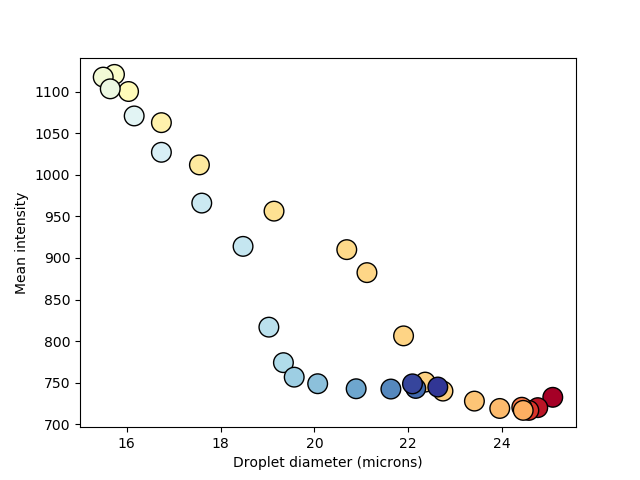

Text(0,0.5,'Mean intensity')

In [6]:
%matplotlib notebook
plt.figure()
plt.scatter(data[:,6], data[:,4], s=200, c=data[:,1], cmap=cm.RdYlBu, edgecolors='k')
plt.xlabel("Droplet diameter (microns)")
plt.ylabel("Mean intensity")

In [7]:
data_dict[data_file] = data

### Again, set the directory and name of file where the data is stored

In [8]:
data_dir = "D:\\Data\\Jack\\Analysis\\"
data_file = "JB01_40x30s_60x_05.csv"



In [9]:
#This reads in the data (which was stored as a text file)
#  We skip the first row as that contains the header
data = np.loadtxt(data_dir + data_file, skiprows=1, delimiter=',')

In [10]:
print("Shape of data: (%i,%i)" % data.shape)
print("So there are %i time points measured." % data.shape[0])

Shape of data: (61,7)
So there are 61 time points measured.


<IPython.core.display.Javascript object>


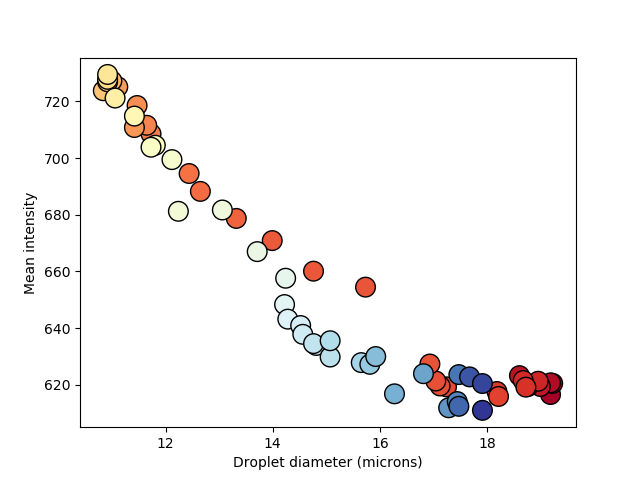

Text(0,0.5,'Mean intensity')

In [11]:
%matplotlib notebook
plt.figure()
plt.scatter(data[:,6], data[:,4], s=200, c=data[:,1], cmap=cm.RdYlBu, edgecolors='k')
plt.xlabel("Droplet diameter (microns)")
plt.ylabel("Mean intensity")

In [12]:
data_dict[data_file] = data

In [13]:
data_dict.keys()

['JB01_40x30s_60x_10.csv', 'JB01_40x30s_60x_05.csv']

## Plotting multiple videos

<IPython.core.display.Javascript object>


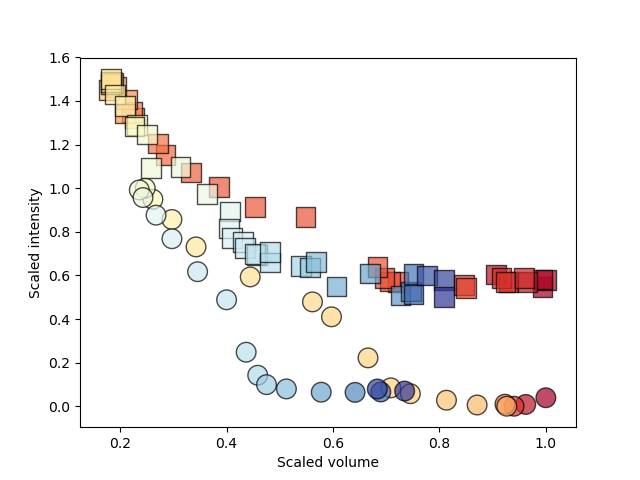

Text(0,0.5,'Scaled intensity')

In [22]:
%matplotlib notebook
plt.figure()
y_axis_shift_step = 0.5
y_axis_shift = 0
marker_styles = ['o','s','D','*','^','P','<','>']
marker_style_index = 0
for key in data_dict.keys():
    data = data_dict[key]
    intensity = data[:,4] - data[:,4].min()
    intensity_scaled = intensity/intensity.max()
    diameter = data[:,6] / data[:,6].max()
    plt.scatter(diameter**3, intensity_scaled + y_axis_shift, s=200, c=data[:,1], 
                cmap=cm.RdYlBu, edgecolors='k',alpha=0.7,marker=marker_styles[marker_style_index])
    y_axis_shift += y_axis_shift_step
    marker_style_index += 1
plt.xlabel("Scaled volume")
plt.ylabel("Scaled intensity")